In [1]:
from indigo import Indigo
import random
import pandas as pd
from ord_data_load import ORD_PATH, draw_reaction
from IPython.display import SVG

#to disable warnings
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')


%load_ext autoreload
%autoreload 2

In [2]:
indigo = Indigo()
indigo.version()

'1.9.0.0-gca3f2ab4a-x86_64-win-msvc-1934'

In [3]:
%%time
all_reactions = pd.read_pickle(f'{ORD_PATH}/all_reactions.pkl')
pd_mask = pd.read_pickle(f'{ORD_PATH}/pd_mask.pkl')
pd_df = all_reactions[pd_mask]

CPU times: total: 18.2 s
Wall time: 18.2 s


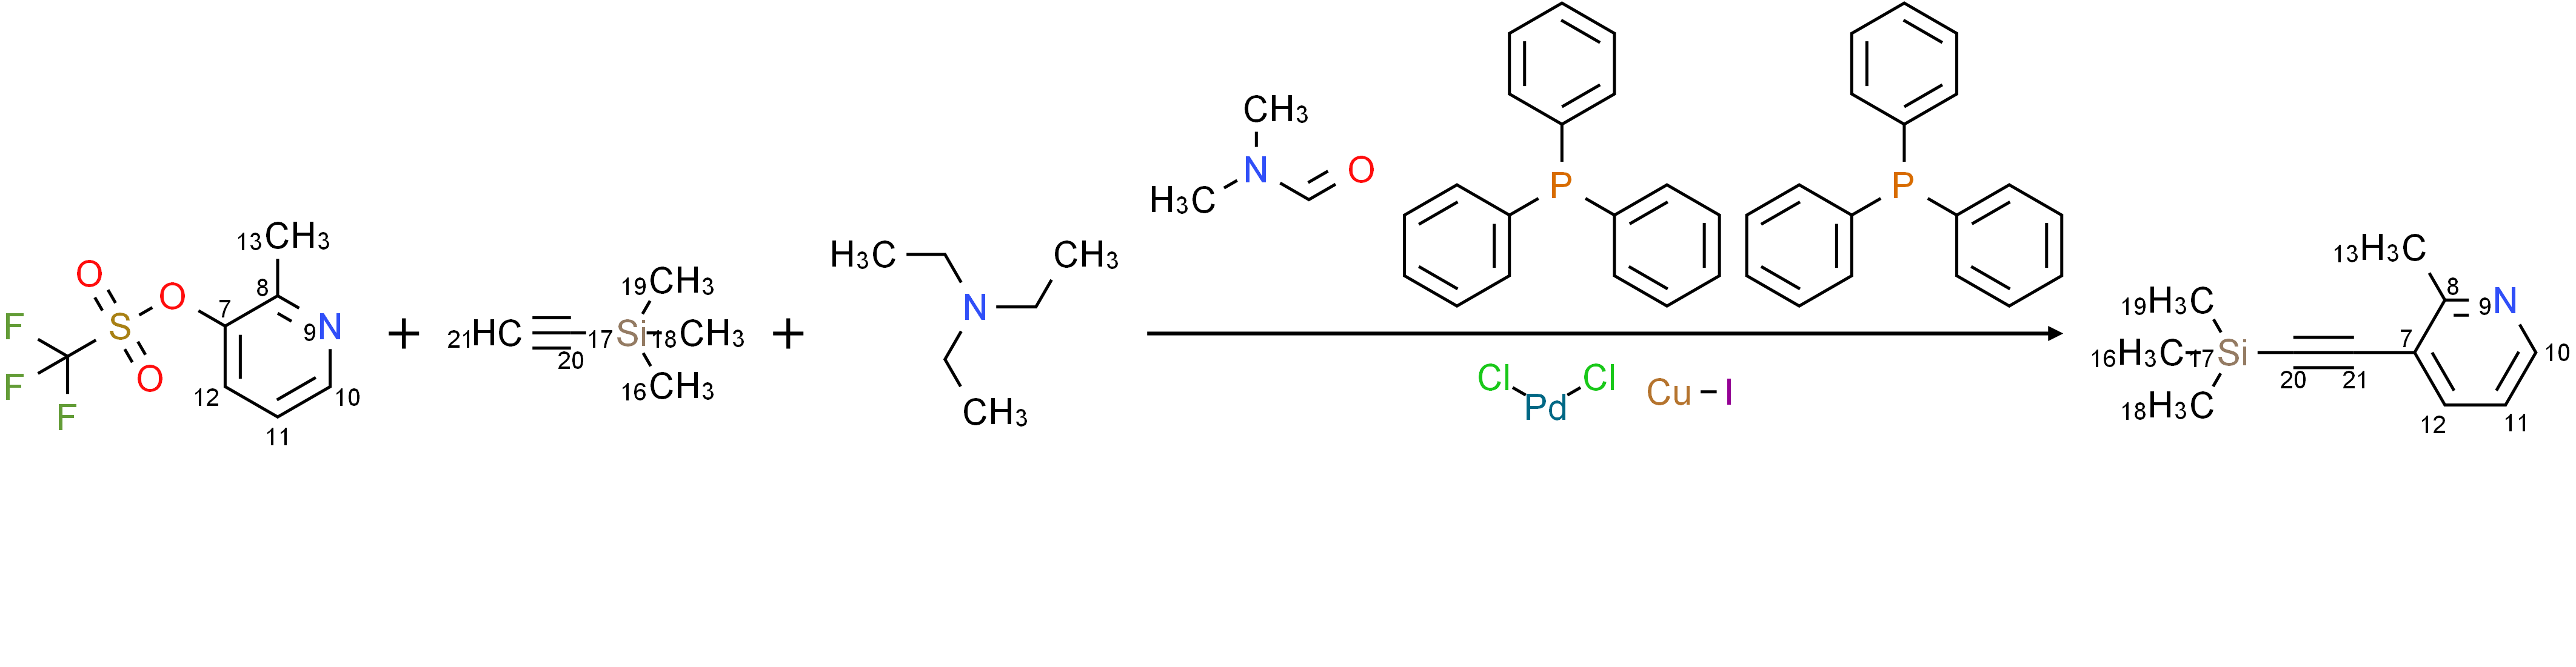

Patent:       US07425634B2
Reaction_id:  ord-14f8cb66d4b1424fbd3ad21b9d5df339
First, 2-methylpyridin-3-yl trifluoromethanesulfonate (34.3 g, 142 mmol), trimethylsilylacetylene (30 ml, 212 mmol), bis(triphenylphosphine)palladium (II) chloride (10.0 g, 14.2 mmol), and copper (I) iodide (2.75 g, 14.4 mmol) were dissolved in N,N-dimethyl formamide (150 ml). Thereafter, triethylamine (43 ml, 309 mmol) was added in a nitrogen atmosphere at room temperature to the mixture. The mixture was then stirred for 3 hours (exothermic reaction took place). The reaction mixture was separated by ethyl acetate and a saturated aqueous ammonium chloride solution and insoluble substance was removed by filtration. The organic layer of the filtrate was washed twice with a saturated aqueous ammonium chloride solution, dried over anhydrous magnesium sulfate, filtrated and concentrated to obtain the title compound (22.6 g, yield: 84.1%) as brown oil.
CPU times: total: 266 ms
Wall time: 270 ms


In [4]:
%%time
draw_reaction(pd_df.iloc[3000])
rxn_smile = pd_df.iloc[3000]['reaction_smile']

In [5]:
rxn = indigo.loadReaction(rxn_smile)
rxn

In [6]:
from indigo.renderer import IndigoRenderer

renderer = IndigoRenderer(indigo)

indigo.setOption("render-output-format", "svg")
indigo.setOption("render-coloring", True)
indigo.setOption("render-relative-thickness", 1.5)

CPU times: total: 46.9 ms
Wall time: 40 ms


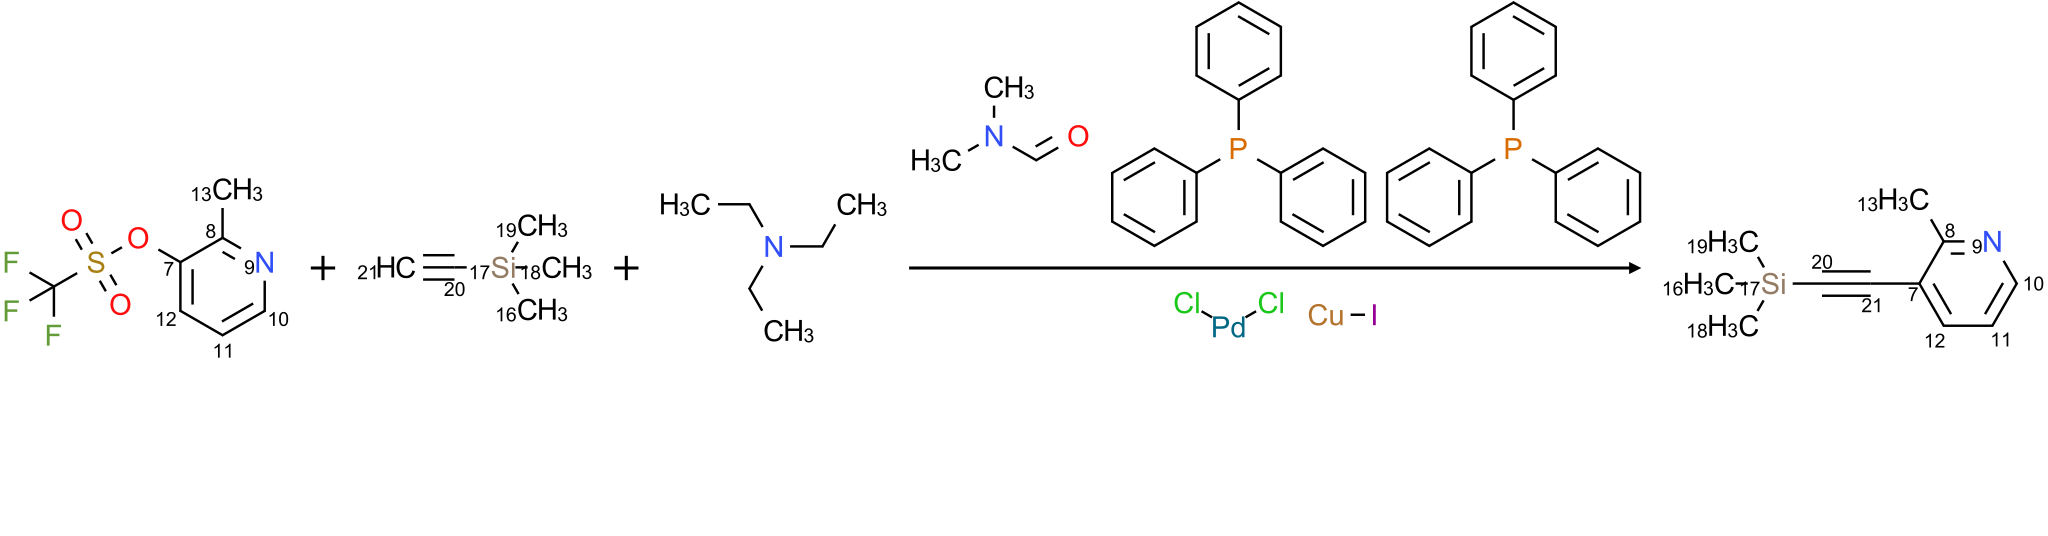

In [7]:
%%time
SVG(renderer.renderToBuffer(rxn))

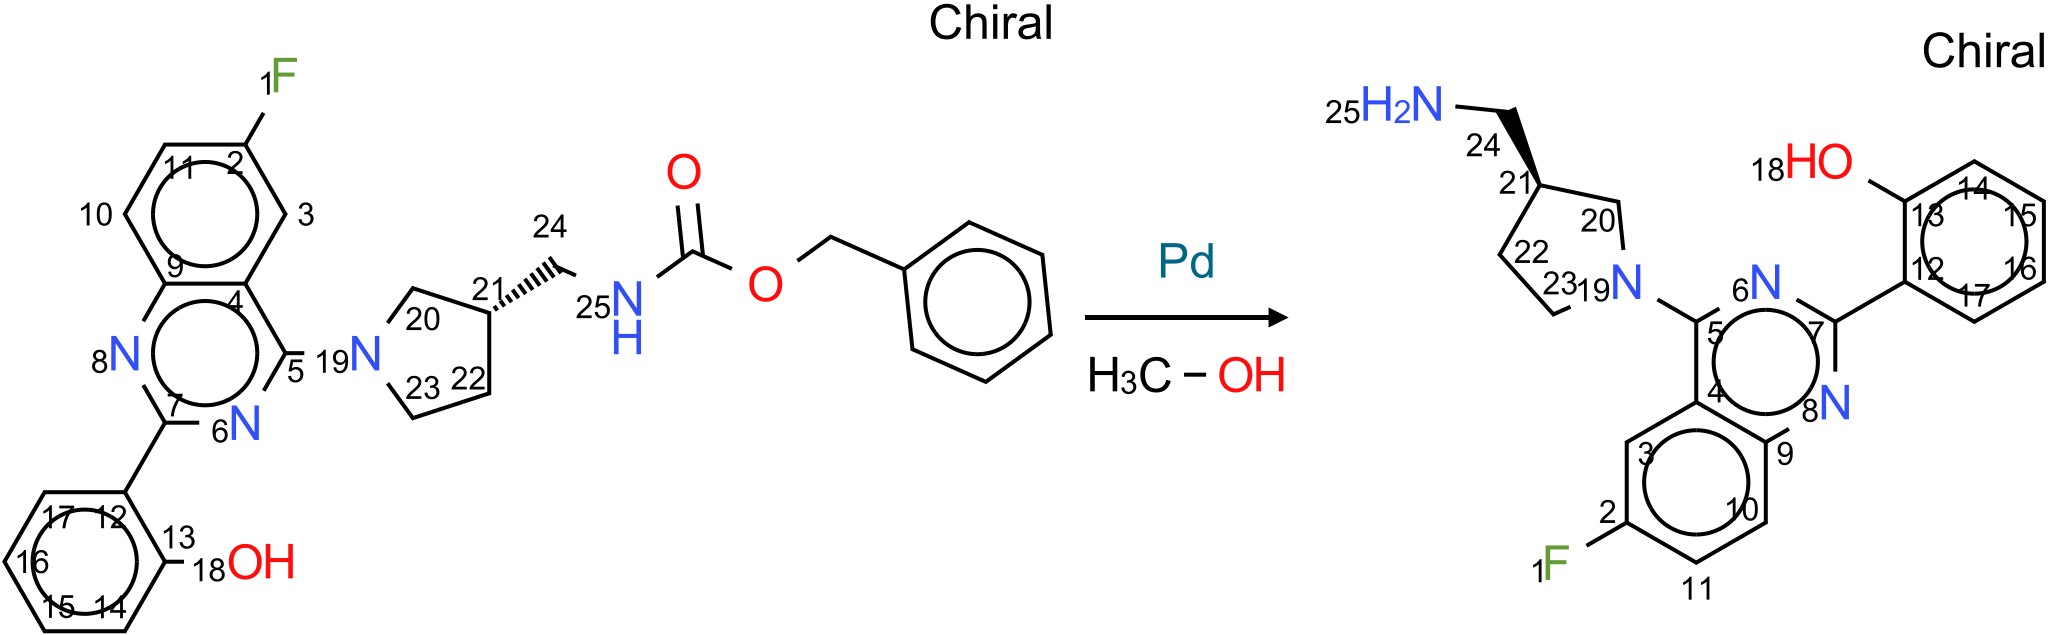

In [8]:
import numpy as np
idx = np.random.randint(0, len(pd_df))
# idx = 59585
rxn = indigo.loadReaction(pd_df['reaction_smile'].iloc[idx])
rxn.aromatize()
SVG(renderer.renderToBuffer(rxn))

21815


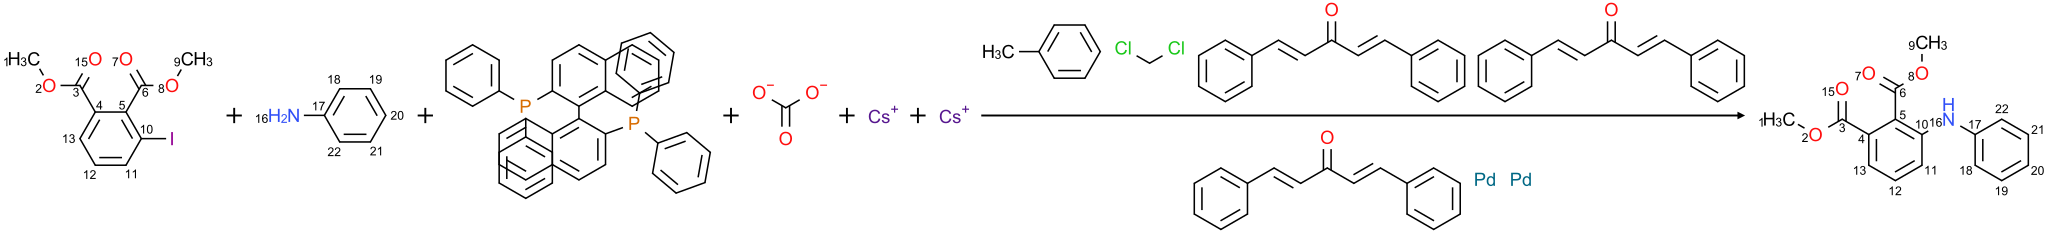

In [9]:
BUCHWALD_RXN_SMARTS = "[c:1]-[Br,Cl,I].[N,n:2]>>[c:1]-[N,n:2]"
query = indigo.loadReactionSmarts(BUCHWALD_RXN_SMARTS)
query.optimize()

idx = 21815
# idx = np.random.randint(0, len(pd_df))
rxn = indigo.loadReaction(pd_df.iloc[idx]['reaction_smile'])

# match = indigo.substructureMatcher(rxn, "DAYLIGHT-AAM").match(query)
match = indigo.substructureMatcher(rxn).match(query)
if match:
    print(idx)
    display(SVG(renderer.renderToBuffer(rxn)))

    #     for bond in mol.iterateBonds():
    #         if match.mapBond(bond):
    #             print(f"atom {bond.index()} matched")

In [10]:
def rxn_match(rxn_smiles, rxn_query) -> bool:
    if rxn_smiles is None:
        return False
    return True if indigo.substructureMatcher(indigo.loadReaction(rxn_smiles)).match(rxn_query) else False

In [11]:
%%time
mask = pd_df['reaction_smile'].apply(rxn_match, rxn_query=query)
buchwald_df = pd_df[mask].copy()
len(buchwald_df)

CPU times: total: 2min 34s
Wall time: 2min 34s


10519

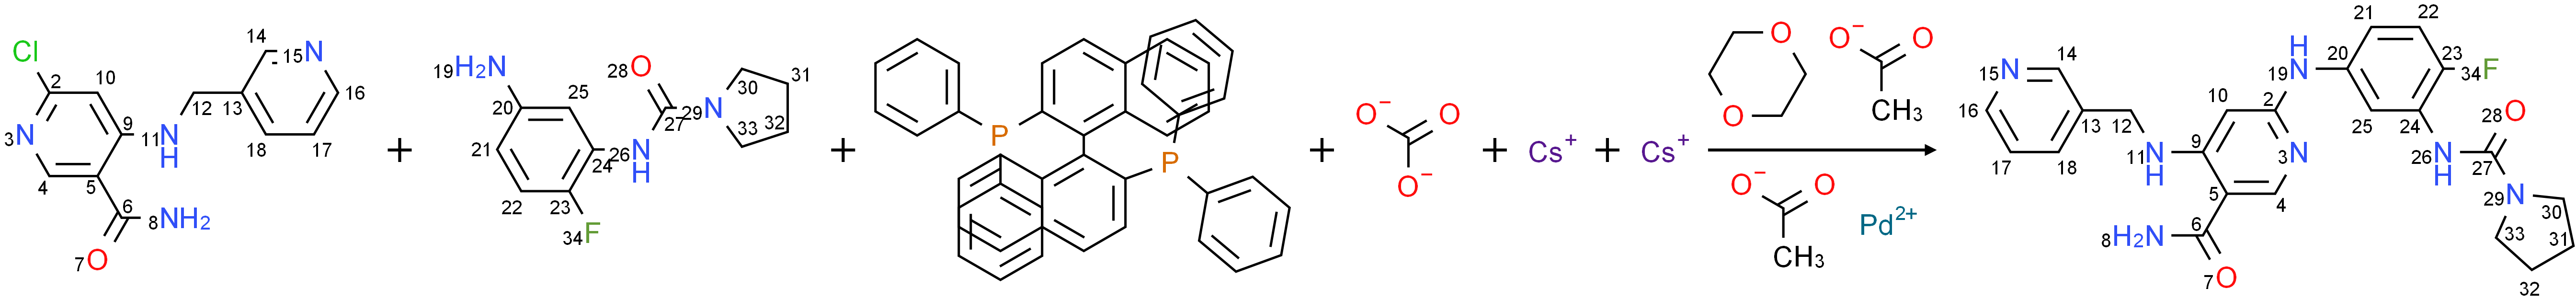

Patent:       US09102625B2
Reaction_id:  ord-2c97bc8d317c43d8a36d30346e0d17e5
A mixture of 6-chloro-4-(pyridin-3-ylmethylamino)nicotinamide (28.2, 27 mg, 0.1 mmol), N-(5-amino-2-fluorophenyl)pyrrolidine-1-carboxamide (28.5, 34 mg, 0.15 mmol), Pd(OAc)2 (2 mg). BINAP (15 mg), Cs2CO3 (100 mg) in dioxane (1 mL) was heated at 120° C. under microwave for 60 min Purification with reversed phase HPLC, 6-(4-fluoro-3-(pyrrolidine-1-carboxamido)phenylamino)-4-(pyridin-3-ylmethylamino)nicotinamide (28.6, 10 mg) was obtained. MS found for C23H24FN7O2 as (M+H)+ 450.5, UV: λ=249.1 nm. 1H NMR: (CD3OD) δ8.50 (s, 1H), δ8.42 (d, 1H), δ8.26 (d, 1H), δ7.80 (dd, 1H), δ7.60 (dd, 1H), δ7.40 (dd, 1H), δ7.00 (dd, 1H), δ6.91 (m, 1H), δ5.88 (d, 1H), δ4.49 (s, 2H), δ3.48 (m, 4H), δ1.99 (b, 4H).
CPU times: total: 219 ms
Wall time: 228 ms


In [12]:
%%time
draw_reaction(buchwald_df)

## Compare Suzuki substructure searches for Pd containing set

In [13]:
%%time
# indigo reaction search
SUZUKI_PATTERN = "[B;X3,4]-[C,c:1].[C,c:2]-[Cl,Br,I,O]>>[C,c:1]-[C,c:2]"

query = indigo.loadReactionSmarts(SUZUKI_PATTERN)
query.optimize()
suzuki_indigo = pd_df['reaction_smile'].apply(rxn_match, rxn_query=query)
suzuki_indigo.sum()

CPU times: total: 2min 42s
Wall time: 2min 42s


35477

In [14]:
def rxn_match_aam(rxn_smiles, rxn_query) -> bool:
    if rxn_smiles is None:
        return False
    return True if indigo.substructureMatcher(indigo.loadReaction(rxn_smiles), "DAYLIGHT-AAM").match(rxn_query) else False

suzuki_indigo_aam = pd_df['reaction_smile'].apply(rxn_match_aam, rxn_query=query)
suzuki_indigo_aam.sum()

34454

In [15]:
def rxn_match_arom(rxn_smiles, rxn_query) -> bool:
    if rxn_smiles is None:
        return False
    rxn = indigo.loadReaction(rxn_smiles)
    rxn.aromatize()
    return True if indigo.substructureMatcher(rxn).match(rxn_query) else False

suzuki_indigo_arom = pd_df['reaction_smile'].apply(rxn_match_aam, rxn_query=query)
suzuki_indigo_arom.sum()

34454

In [16]:
%%time
# rdkit reaction search
from ord_data_load import is_reaction_of_type
from rdkit.Chem.AllChem import ReactionFromSmarts

rdkit_pattern = ReactionFromSmarts(SUZUKI_PATTERN)

suzuki_rdkit = pd_df['reaction_smile'].apply(is_reaction_of_type, reaction_type_pattern=rdkit_pattern)
suzuki_rdkit.sum()

CPU times: total: 1min 47s
Wall time: 1min 47s


30593

In [17]:
print("{indigo}          : ", suzuki_indigo.sum())
print("{rdkit}           : ", suzuki_rdkit.sum())
print("{indigo} - {rdkit}: ", (suzuki_indigo & ~suzuki_rdkit).sum())
print("{rdkit} - {indigo}: ", (suzuki_rdkit & ~suzuki_indigo).sum())
print("{rdkit} ∪ {indigo}: ", (suzuki_rdkit | suzuki_indigo).sum())
print("{rdkit} ∩ {indigo}: ", (suzuki_rdkit & suzuki_indigo).sum())

{indigo}          :  35477
{rdkit}           :  30593
{indigo} - {rdkit}:  9013
{rdkit} - {indigo}:  4129
{rdkit} ∪ {indigo}:  39606
{rdkit} ∩ {indigo}:  26464


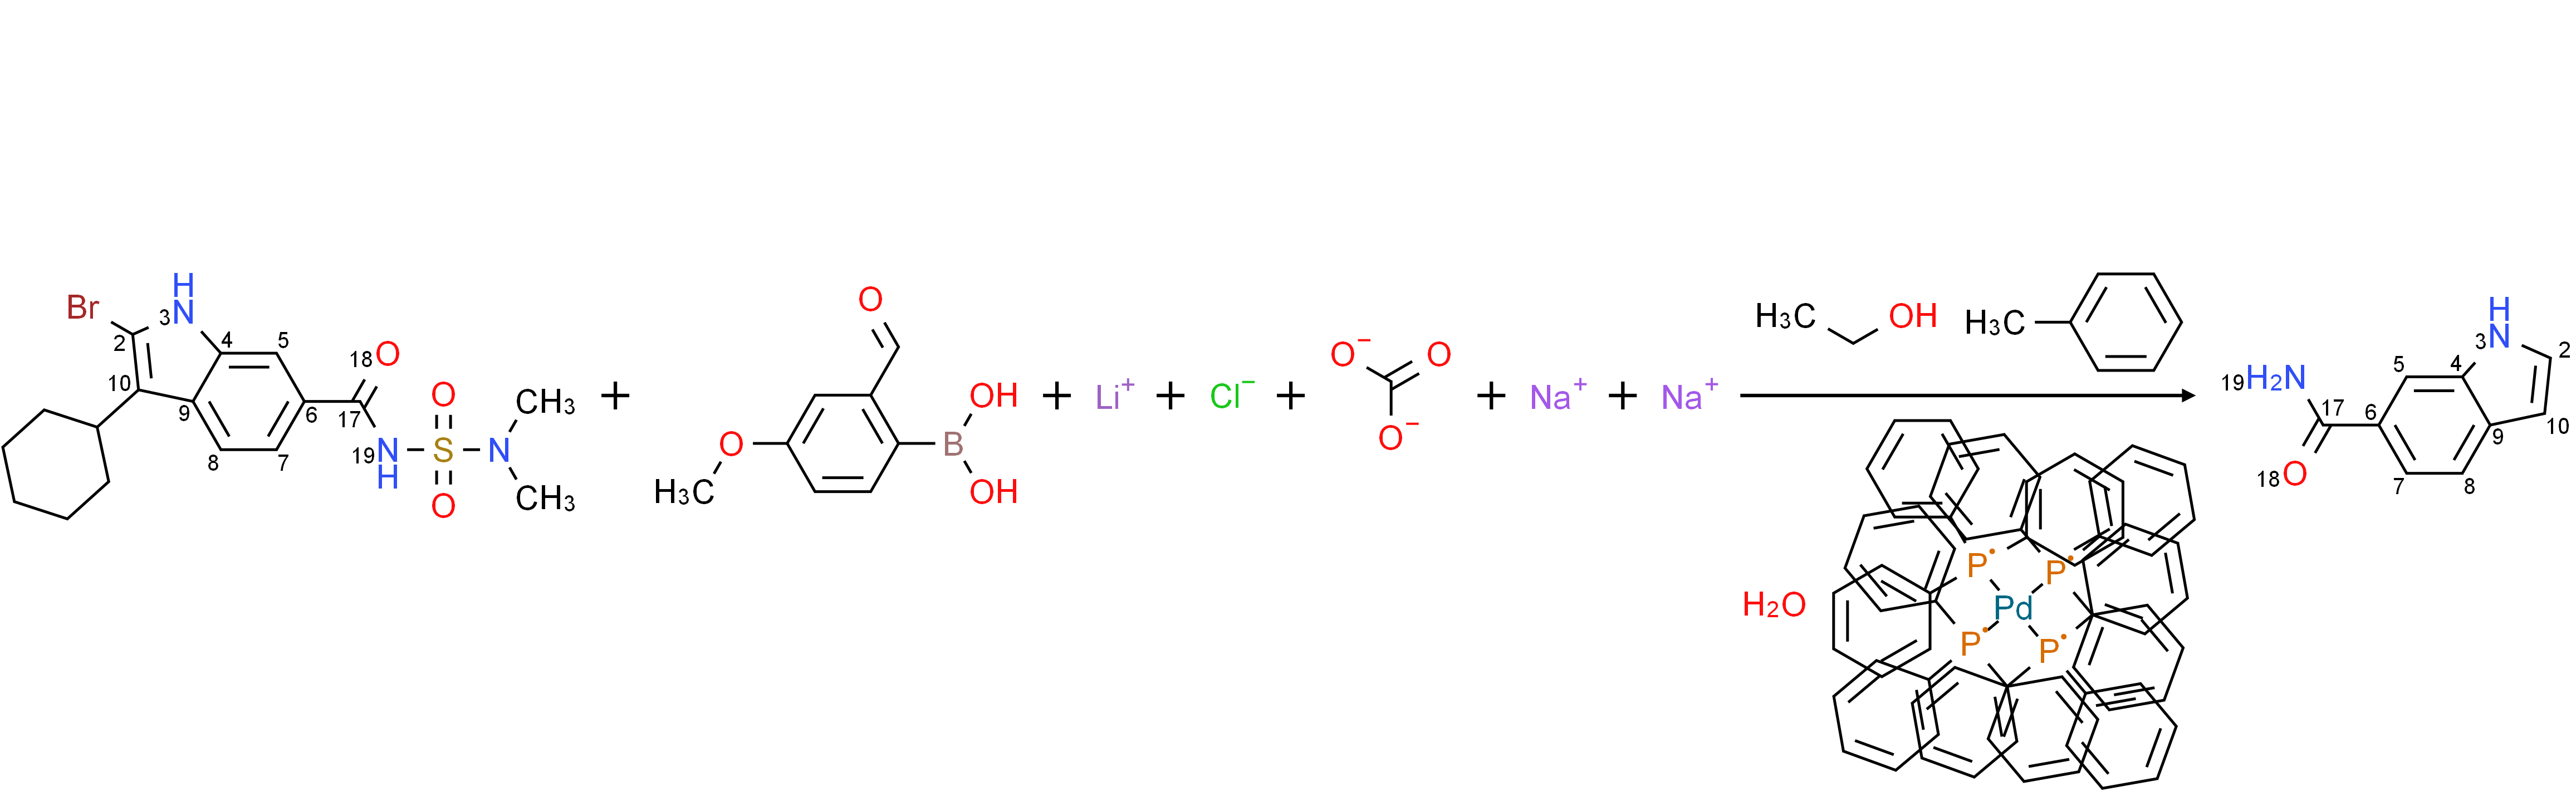

Patent:       US07521443B2
Reaction_id:  ord-2039dd11f4634f6e84188133c1645464
To a slurried solution of 2-bromo-3-cyclohexyl-N-[(dimethylamino)sulfonyl]-indole-6-carboxamide (54.0 g, 126 mmol), 4-methoxy-2-formylphenylboronic acid (29.5 g, 164 mmol) and LiCl (13.3 g, 315 mmol) in EtOH/toluene (1:1, 1 L) was added a solution of Na2CO3 (40.1 g, 379 mmol) in water (380 mL). The reaction mixture was stirred 10 min. and then Pd(PPh3)4 (11.3 g, 10.0 mmol) was added. The reaction solution was flushed with nitrogen and heated at 70° C. (internal monitoring) overnight and then cooled to rt. The reaction was diluted with EtOAc (1 L) and EtOH (100 mL), washed carefully with 1N aqueous HCl (1 L) and brine (500 mL), dried (MgSO4), filtered and concentrated. The residual solids were stirred with Et2O (600 mL) for 1 h and collected by filtration to yield 1H-indole-6-carboxamide, 3-cyclohexyl-N-[(dimethylamino)sulfonyl]-2-(2-formyl-4-methoxyphenyl)- (52.8 g, 109 mmol, 87%) as a yellow powder which was

In [18]:
### indigo vs rdkit ###
# unique to rdkit
draw_reaction(pd_df[suzuki_rdkit & ~suzuki_indigo])

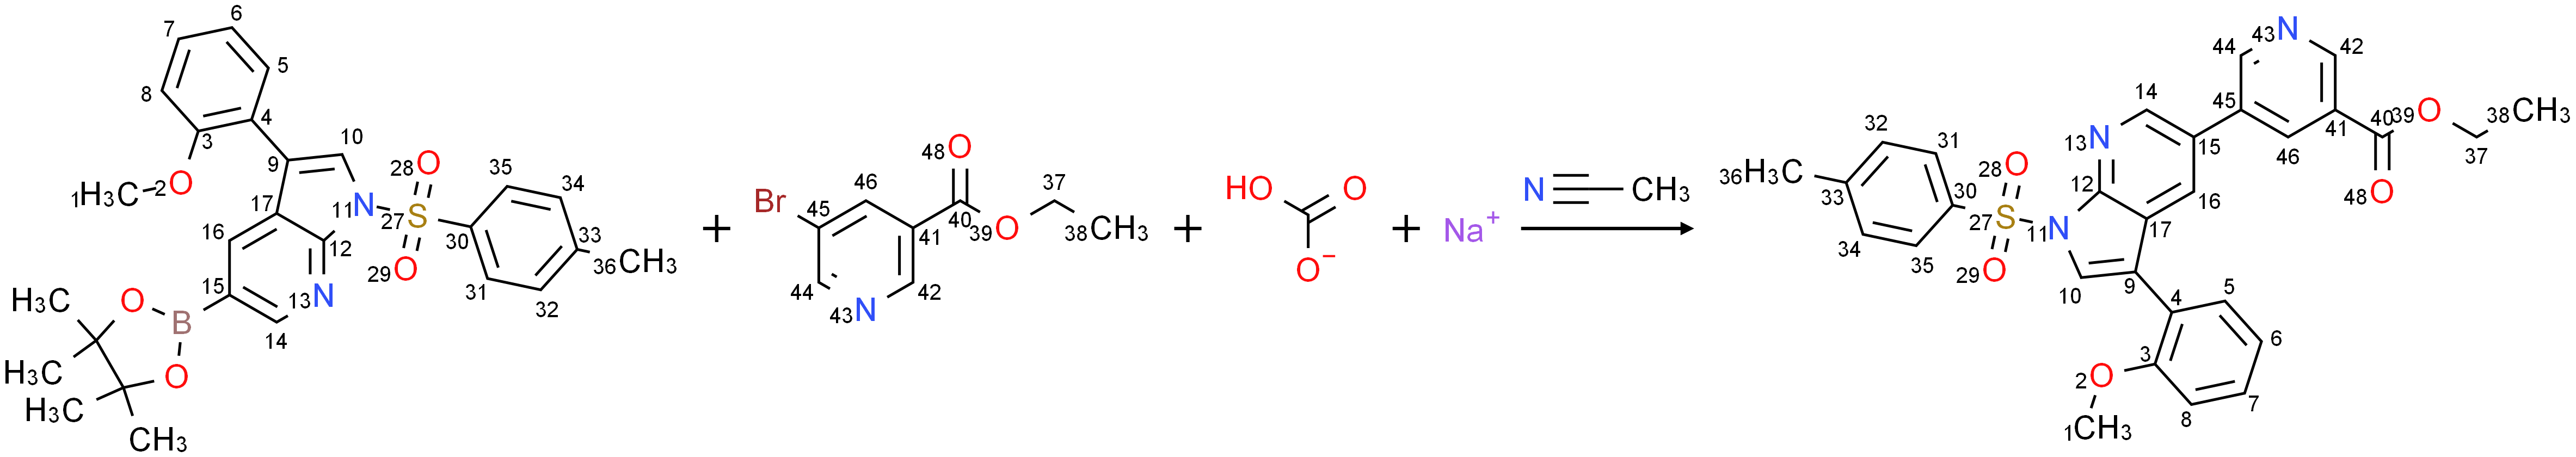

Patent:       US07709645B2
Reaction_id:  ord-8cc09e4a302b4993b8c7831660523d26
Into a 20 mL Personal Chemistry microwave reaction vial were added 3-(2-Methoxy-phenyl)-5-(4,4,5,5-tetramethyl-[1,3,2]dioxaborolan-2-yl)-1-(toluene-4-sulfonyl)-1H-pyrrolo[2,3-b]pyridine (0.995 g, 2.18 mmol), 5-Bromo-nicotinic acid ethyl ester (0.645 g, 2.33 mmol), 1,1′-bis(diphenylphosphino)ferrocenepalladium(II)-dichloride dichloromethane adduct (95.5 mg, 0.117 mmol), acetonitrile (10 mL) and saturated aqueous NaHCO3 (10 mL). The vial was sealed, purged with N2, and irradiated in a Personal Chemistry Optimizer at 90° C. for 15 min. The layers were separated, and the aqueous phase was extracted 3× with EtOAc. The combined organic phase was treated with brine, dried (Na2SO4), filtered and concentrated. Purification by flash silica gel chromatography using a gradient of ethyl acetate and hexanes afforded 5-[3-(2-Methoxy-phenyl)-1-(toluene-4-sulfonyl)-1H-pyrrolo[2,3-b]pyridin-5-yl]-nicotinic acid ethyl ester as 

In [19]:
#unique to indigo
draw_reaction(pd_df[suzuki_indigo & ~suzuki_rdkit])

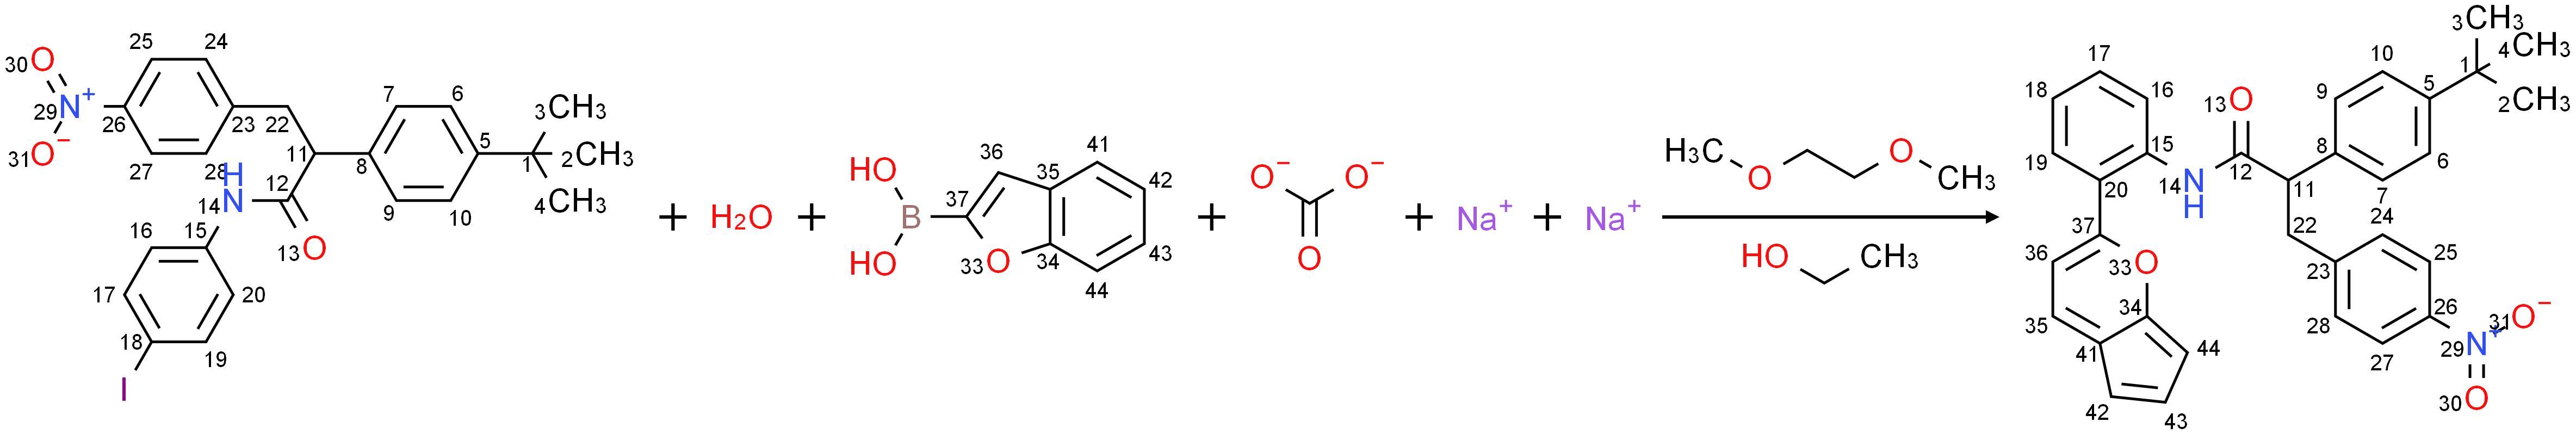

Patent:       US08710236B2
Reaction_id:  ord-e804f232e4564455bad6d84cf3536cd3
To 2-(4-tert-Butyl-phenyl)-N-(4-iodo-phenyl)-3-(4-nitro-phenyl)-propionamide (1056 mg, 2 mmol) in 8 ml 1,2-dimethoxyethane, 4 ml ethanol, and 2 ml water was added benzo[b]furan-2-boronic acid (972 mg, 6 mmol), bis(tri-o-tolylphosphine)palladium(II)dichloride (158 mg, 0.2 mmol), and sodium carbonate (1060 mg, 10 mmol). The reaction mixture was stirred at 125° C. for 6 min, filtered, and concentrated. Chromatography of the residue (20% ethyl acetate in hexane) afforded N-(4-Benzofuran-2-yl-phenyl)-2-(4-tert-butyl-phenyl)-3-(4-nitro-phenyl)-propionamide as a yellow foam (830 mg, 80%).


In [20]:
# indigo "DAYLIGHT-AAM" vs default
draw_reaction(pd_df[suzuki_indigo & ~suzuki_indigo_aam])

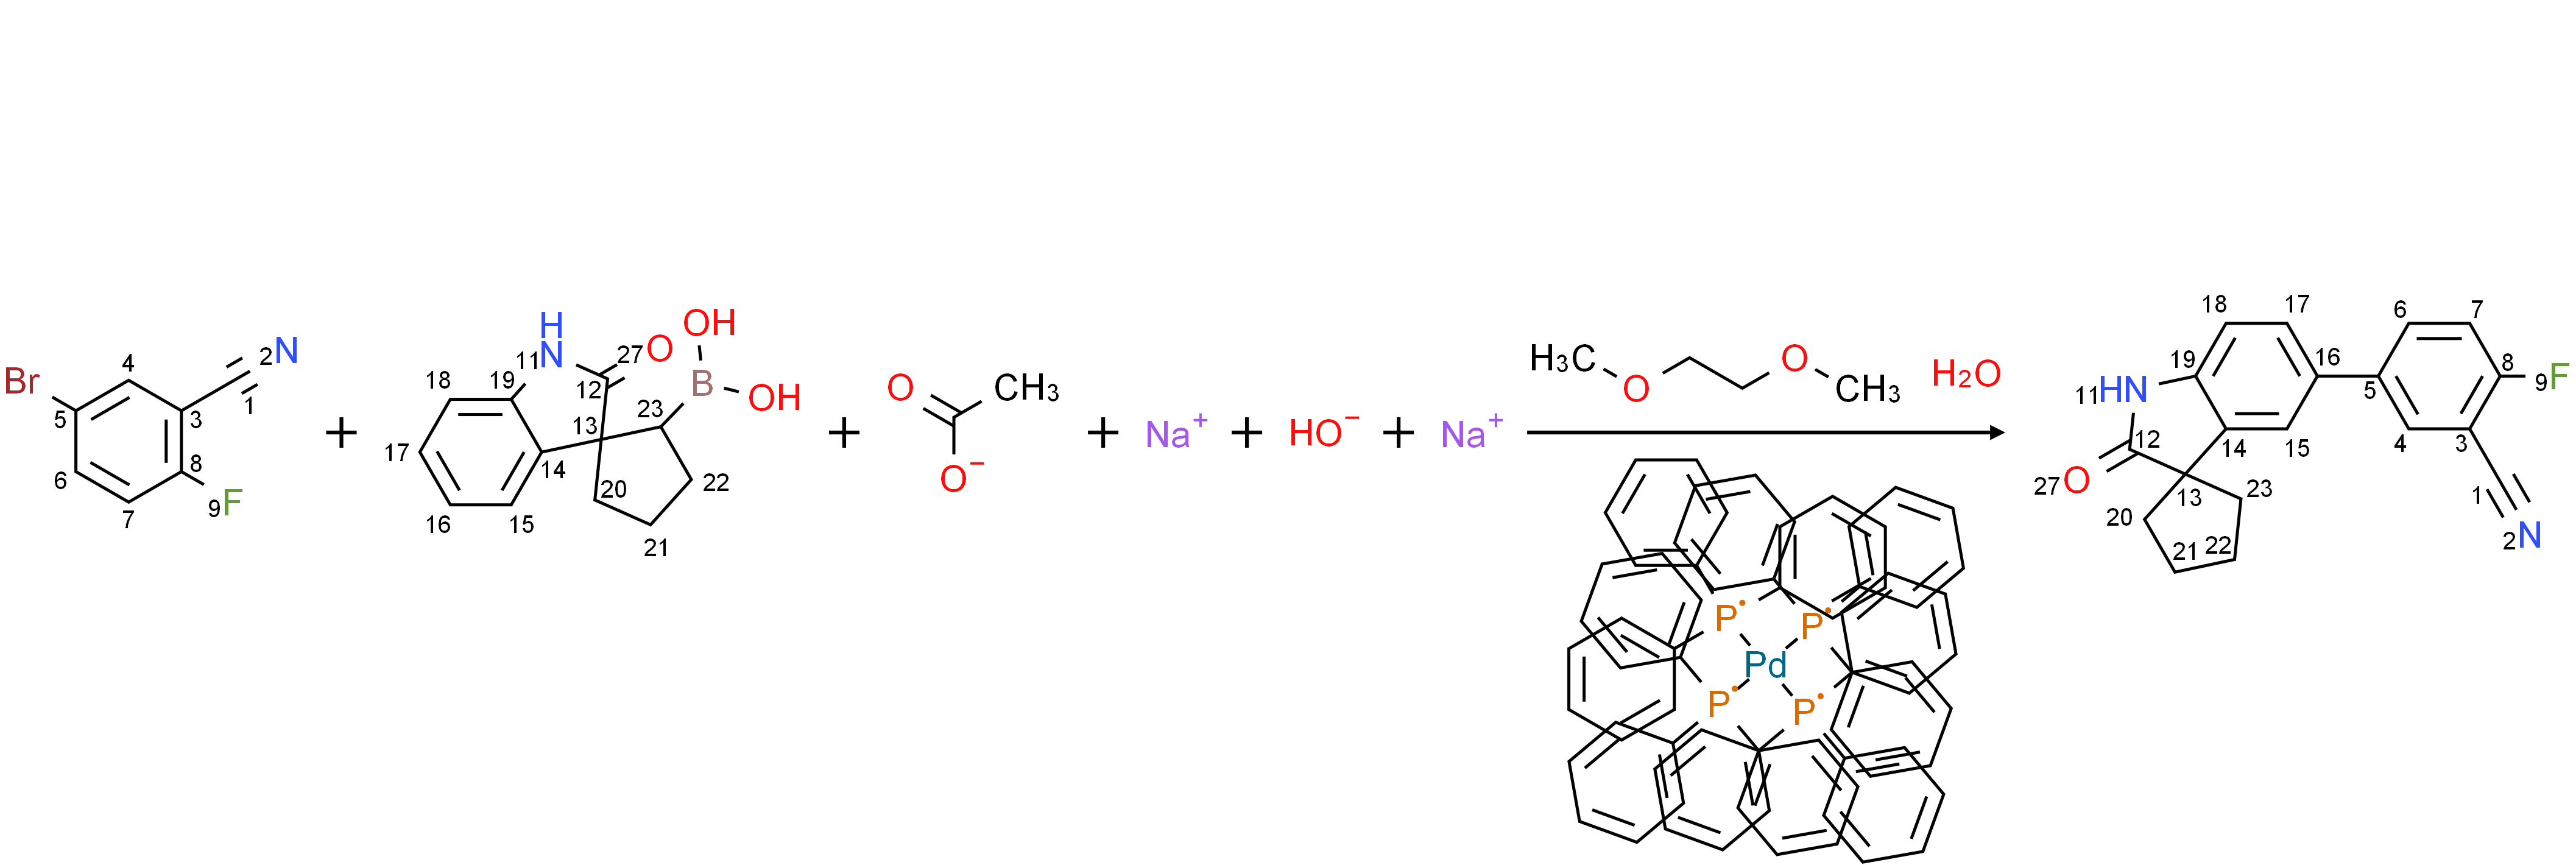

Patent:       US06391907B1
Reaction_id:  ord-2c7494cd99fa42d883618e3c678fcfb2
A solution of 3-cyano-4-fluoro-bromobenzene (0.63 g, 3.1 mmol), and tetrakis(triphenylphosphine)palladium(0) (0.2 g) in ethylene glycol dimethyl ether (20 cm3) was stirred under N2 for 20 minutes. To this mixture was then added (spiro[cyclopentane-1,3′-[3H]indol]-2′(1′H)-one-5-yl) boronic acid (1.0 g, 4.7 mmol) and sodium acetate (1.0 g, 9.4 mmol) in water (5 cm3). The solution was brought to reflux for 18 hours and then cooled to room temperature, poured into 2N NaOH and extracted with EtOAc (×3). The combined extracts were washed with water, brine, dried (MgSO4), and evaporated. The residue was purified by column chromatography (SiO2, EtOAc, hexane) to afford the title compound (0.10 g, 10%) as white crystals. mp: 264-266° C.; 1H NMR (DMSO-d6) δ10.4 (s, 1H), 8.3 (dd, 1H, J=2.4, 3.7 Hz), 8.1-8.0 (m, 1H), 7.6-7.5 (m, 2H), 7.5 (dd, 1H, J=1.9, 6.3 Hz), 6.9 (d, 1H, J=8.1 Hz), 2.0-1.9 (m, 8H); MS [M−H]−=305.


In [21]:
#TODO fix 5-position structures for spiro structures
draw_reaction(pd_df[suzuki_indigo & ~suzuki_rdkit & (pd_df['patent'] == "US06391907B1")])

## Using dask dataframe

In [22]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
ProgressBar().register()

dds = dd.from_pandas(pd_df['reaction_smile'], npartitions=240)
suzuki_rdkit = dds.apply(is_reaction_of_type,
                         reaction_type_pattern=rdkit_pattern,
                         meta=pd.Series(dtype=bool)).compute(scheduler='processes') # rdkit functions are not parallelizable using "threads"
suzuki_rdkit.sum()

[########################################] | 100% Completed | 16.11 s


30593

In [23]:
query = indigo.loadReactionSmarts(SUZUKI_PATTERN)

def rxn_match(rxn_smiles) -> bool:
    if rxn_smiles is None:
        return False
    return True if indigo.substructureMatcher(indigo.loadReaction(rxn_smiles)).match(query) else False

dds = dd.from_pandas(pd_df['reaction_smile'], npartitions=240)
suzuki_indigo = dds.apply(rxn_match,
                          # rxn_query=query,
                          meta=pd.Series(dtype=bool)).compute(scheduler='threads')
suzuki_indigo.sum()

[########################################] | 100% Completed | 25.54 s


35477

In [24]:
print("{indigo}          : ", suzuki_indigo.sum())
print("{rdkit}           : ", suzuki_rdkit.sum())
print("{indigo} - {rdkit}: ", (suzuki_indigo & ~suzuki_rdkit).sum())
print("{rdkit} - {indigo}: ", (suzuki_rdkit & ~suzuki_indigo).sum())
print("{rdkit} ∪ {indigo}: ", (suzuki_rdkit | suzuki_indigo).sum())
print("{rdkit} ∩ {indigo}: ", (suzuki_rdkit & suzuki_indigo).sum())

{indigo}          :  35477
{rdkit}           :  30593
{indigo} - {rdkit}:  9013
{rdkit} - {indigo}:  4129
{rdkit} ∪ {indigo}:  39606
{rdkit} ∩ {indigo}:  26464


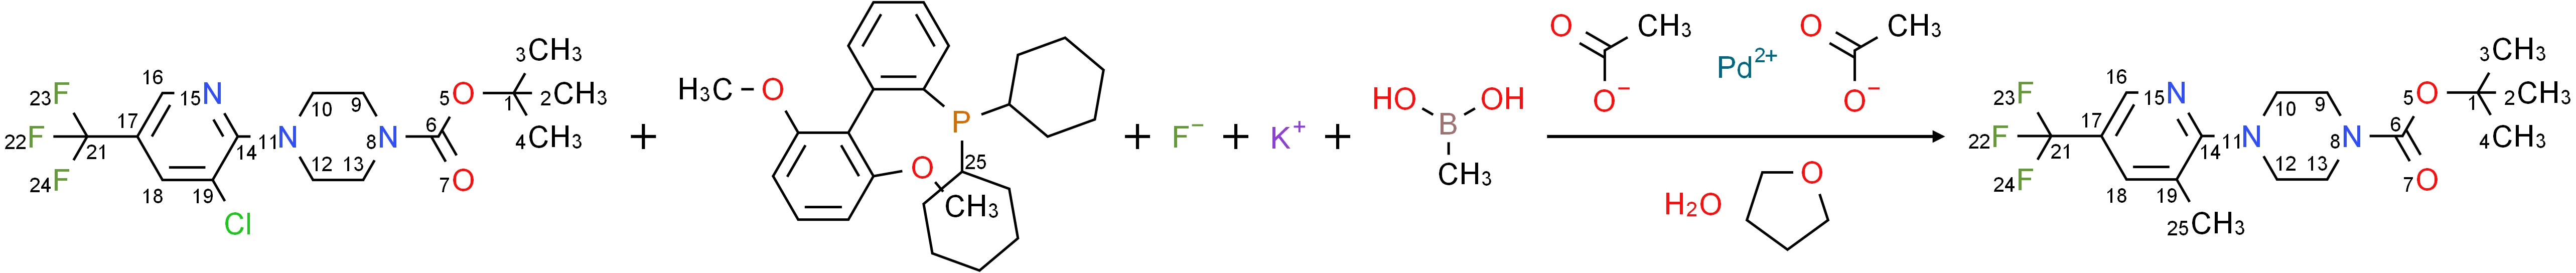

Patent:       US08354401B2
Reaction_id:  ord-cb5da3a904244a7eaaf1acdd45d48614
To 2,3-dichloro-5-trifluoromethylpyridine (25 g) were added 1-BOC-piperazine (23.84 g), potassium carbonate (32.08 g), N,N-dimethylformamide (50 mL) and toluene (50 mL), and the mixture was stirred at 100° C. for 8 hr. Water was added to the reaction mixture, and the mixture was extracted with ethyl acetate. The organic layer was washed with water and saturated brine, and the solvent was evaporated. The residue was purified by column chromatography (hexane:ethyl acetate) to give 4-(3-chloro-5-trifluoromethylpyridin-2-yl)piperazine-1-carboxylic acid tert-butyl ester (45.71 g). To 4-(3-chloro-5-trifluoromethylpyridin-2-yl)piperazine-1-carboxylic acid tert-butyl ester (11 g) were added palladium (II) acetate (0.726 g), 2-dicyclohexylphosphino-2′,6′-dimethoxybiphenyl (2.692 g), potassium fluoride (15.06 g), methylboronic acid (7.88 g) and tetrahydrofuran (300 mL), and the mixture was refluxed under a nitrogen str

In [55]:
draw_reaction(pd_df[suzuki_rdkit & ~suzuki_indigo])

## Compare Suzuki substructure searches for all_reactions

In [ ]:
dds = dd.from_pandas(all_reactions['reaction_smile'], npartitions=240)
suzuki_rdkit = dds.apply(is_reaction_of_type,
                 reaction_type_pattern=rdkit_pattern,
                 meta=pd.Series(dtype=bool)).compute(scheduler='processes') # rdkit functions are not parallelizable using "threads"
suzuki_rdkit.sum()

[                                        ] | 0% Completed | 11.97 sms


In [ ]:
query = indigo.loadReactionSmarts(SUZUKI_PATTERN)

def rxn_match(rxn_smiles) -> bool:
    if rxn_smiles is None:
        return False
    return True if indigo.substructureMatcher(indigo.loadReaction(rxn_smiles)).match(query) else False

dds = dd.from_pandas(all_reactions['reaction_smile'], npartitions=240)
suzuki_indigo = dds.apply(rxn_match,
                 # args=[query,),
                 # rxn_query=query,
                 meta=pd.Series(dtype=bool)).compute(scheduler='threads')
suzuki_indigo.sum()

In [ ]:
print("{indigo}          : ", suzuki_indigo.sum())
print("{rdkit}           : ", suzuki_rdkit.sum())
print("{indigo} - {rdkit}: ", (suzuki_indigo & ~suzuki_rdkit).sum())
print("{rdkit} - {indigo}: ", (suzuki_rdkit & ~suzuki_indigo).sum())
print("{rdkit} ∪ {indigo}: ", (suzuki_rdkit | suzuki_indigo).sum())
print("{rdkit} ∩ {indigo}: ", (suzuki_rdkit & suzuki_indigo).sum())

In [ ]:
# unique to rdkit
draw_reaction(all_reactions[suzuki_rdkit & ~suzuki_indigo])

In [ ]:
indigo.setOption("embedding-uniqueness", "bonds")

dds = dd.from_pandas(all_reactions['reaction_smile'], npartitions=240)
suzuki_indigo_bonds = dds.apply(rxn_match,
                          # args=[query,),
                          # rxn_query=query,
                          meta=pd.Series(dtype=bool)).compute(scheduler='threads')
suzuki_indigo_bonds.sum()

In [ ]:
indigo.setOption("embedding-uniqueness", "none")

dds = dd.from_pandas(all_reactions['reaction_smile'], npartitions=240)
suzuki_indigo_none = dds.apply(rxn_match,
                                # args=[query,),
                                # rxn_query=query,
                                meta=pd.Series(dtype=bool)).compute(scheduler='threads')
suzuki_indigo_none.sum()

In [ ]:
indigo.setOption("embedding-uniqueness", "atoms")